In [4]:
import pandas as pd

DATA_PATH = '/home/kshipra/work/major/ml experiments/data/manually_combined.xlsx'

eos = pd.read_excel(DATA_PATH, sheet_name='all_stacked_eos')
sentinel = pd.read_excel(DATA_PATH, sheet_name='all_stacked_sentinel')
combined = pd.read_excel(DATA_PATH, sheet_name='eos_sent_combined')

len(eos), len(sentinel), len(combined)

(747, 796, 747)

In [5]:
import tensorflow as tf

Epochs:  42%|████▏     | 84/200 [00:19<00:09, 12.02epoch/s, loss=16.7078, val_loss=17.9808]

# Only EOS

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (504, 2)
X_test shape:  (75, 2)
y_train shape: (504,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs: 100%|██████████| 1000/1000 [01:26<00:00, 11.62epoch/s, loss=0.7417, val_loss=2.0875] 



--------- TRAINING LOWER MODEL -----------



Epochs: 100%|██████████| 1000/1000 [01:22<00:00, 12.10epoch/s, loss=0.5074, val_loss=0.5844]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


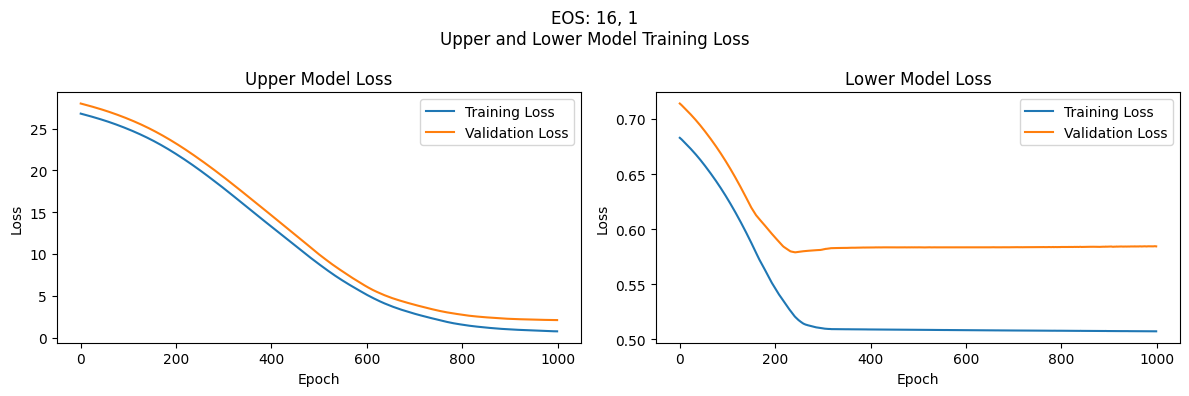

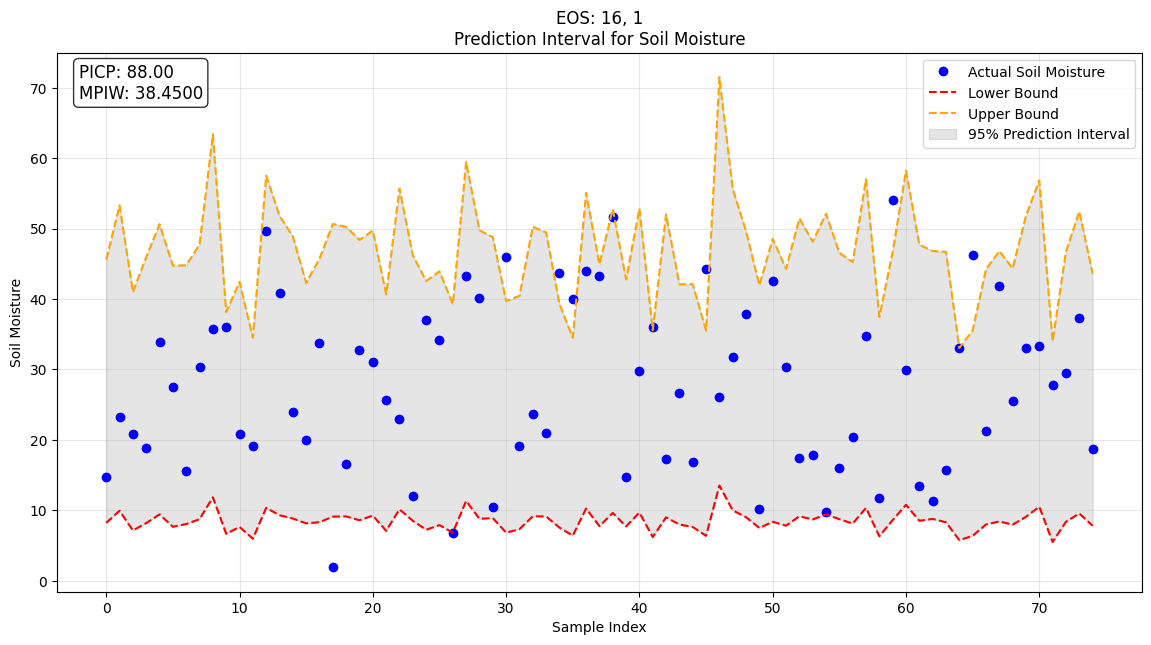

In [3]:
from model_experiments import PredictionIntervalEstimation

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

exp = PredictionIntervalEstimation(eos, features=['HH', 'HV'], target='SM', satellite='EOS')
exp.run_experiment(model, model_param_string='16, 1', optimizer=optimizer, epochs=1000)

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (504, 2)
X_test shape:  (75, 2)
y_train shape: (504,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs: 100%|██████████| 1000/1000 [01:25<00:00, 11.73epoch/s, loss=0.6145, val_loss=1.9474] 



--------- TRAINING LOWER MODEL -----------



Epochs:  12%|█▏        | 121/1000 [00:10<01:18, 11.27epoch/s, loss=0.5112, val_loss=0.5849]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


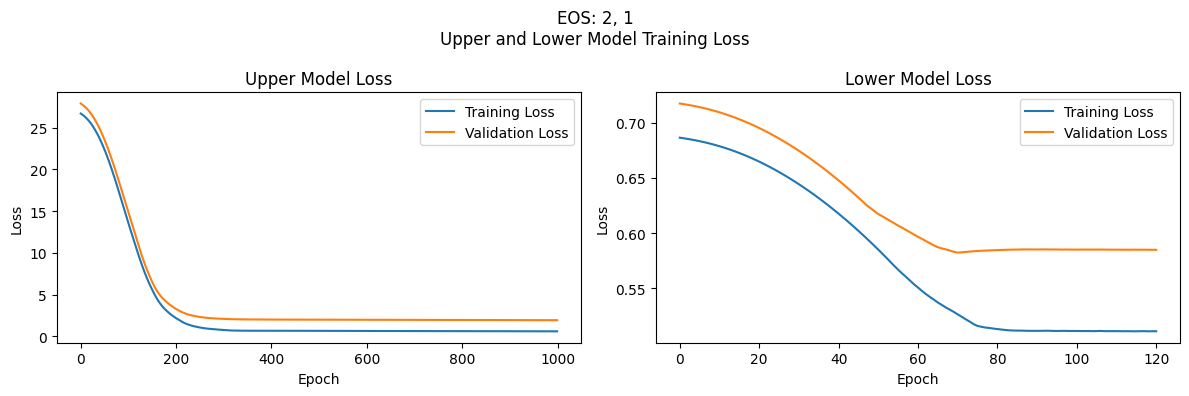

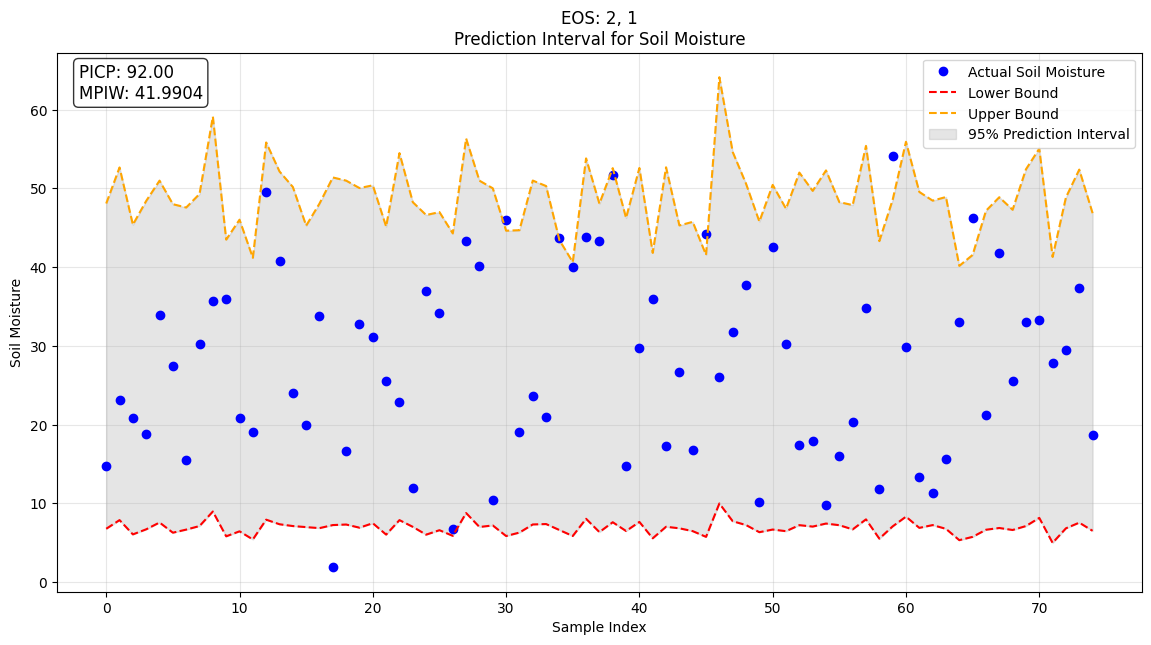

In [3]:
from model_experiments import PredictionIntervalEstimation

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(eos, features=['HH', 'HV'], target='SM', satellite='EOS')
exp.run_experiment(model, model_param_string='2, 1', epochs=1000)

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (504, 2)
X_test shape:  (75, 2)
y_train shape: (504,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs: 100%|██████████| 1000/1000 [01:24<00:00, 11.88epoch/s, loss=0.6166, val_loss=1.9507]



--------- TRAINING LOWER MODEL -----------



Epochs:  12%|█▏        | 120/1000 [00:10<01:16, 11.48epoch/s, loss=0.5102, val_loss=0.5851]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


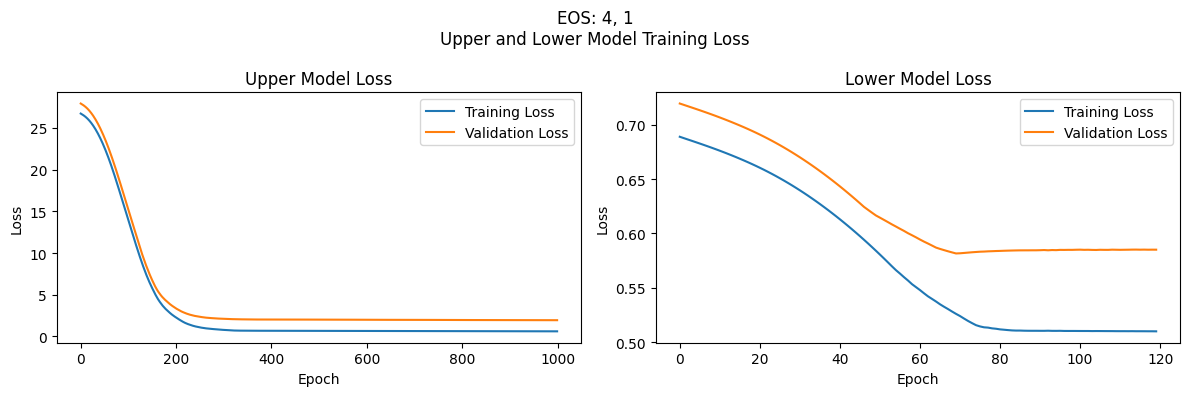

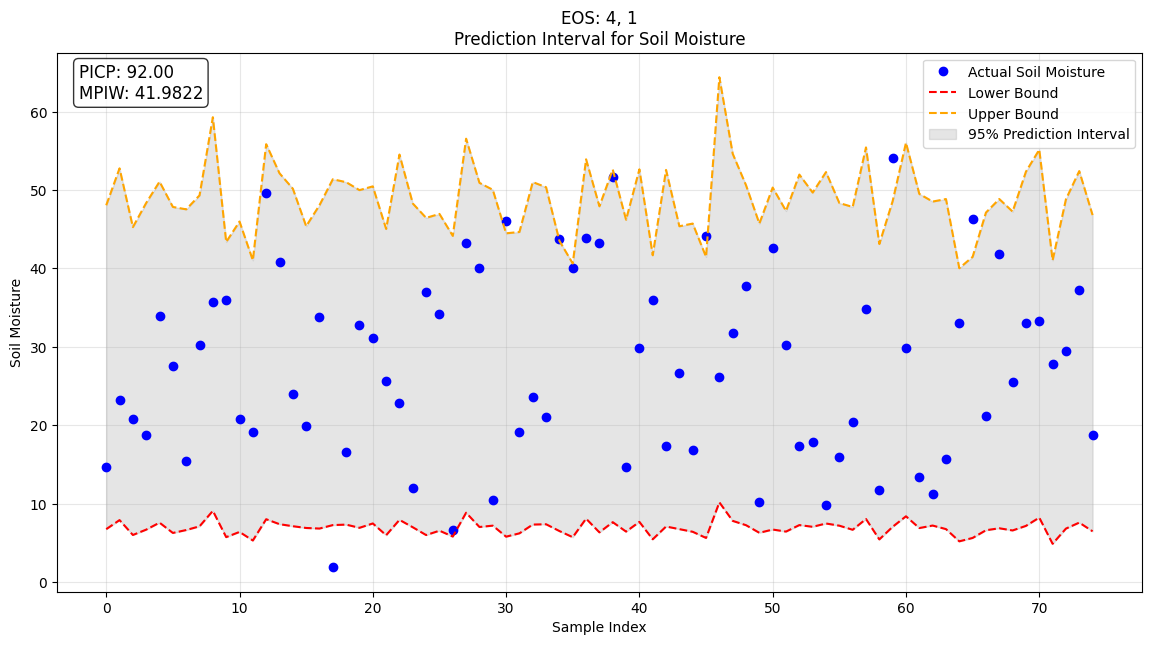

In [6]:
from model_experiments import PredictionIntervalEstimation

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(eos, features=['HH', 'HV'], target='SM', satellite='EOS')
exp.run_experiment(model, model_param_string='4, 1', epochs=1000)

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (504, 2)
X_test shape:  (75, 2)
y_train shape: (504,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------


--------- TRAINING LOWER MODEL -----------

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


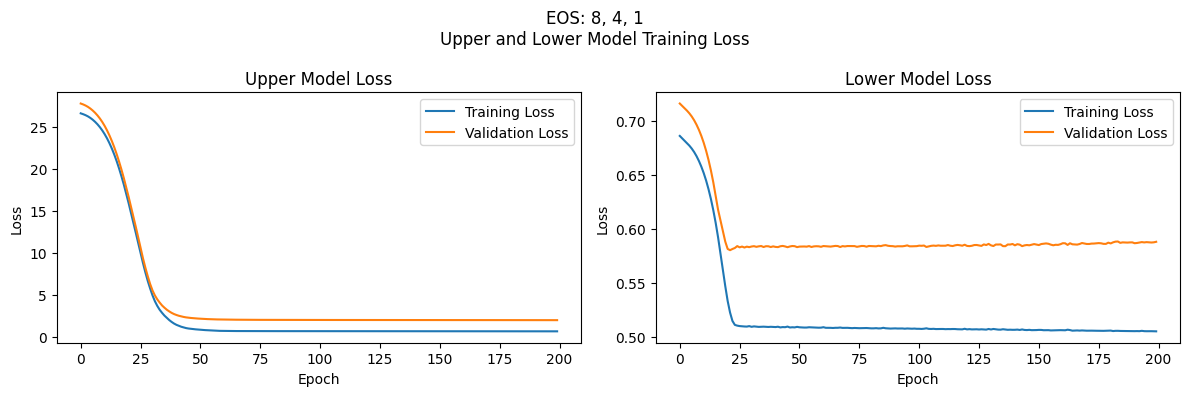

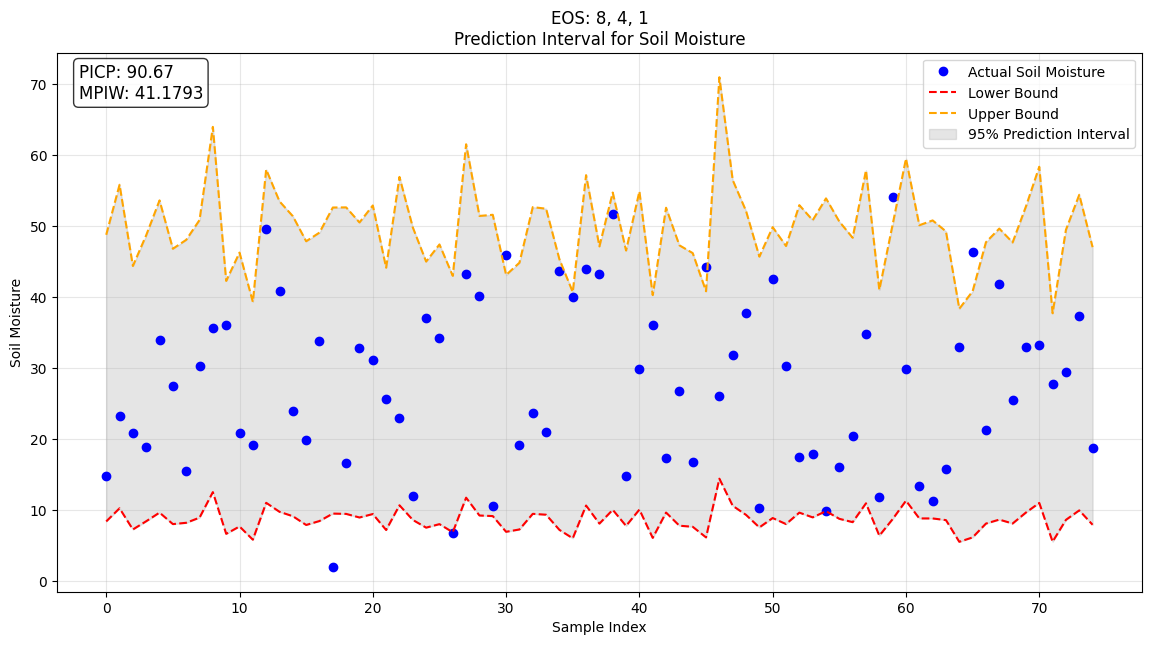

In [6]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'), # Less aggressive bottleneck
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(eos, features=['HH', 'HV'], target='SM', satellite='EOS')
exp.run_experiment(model, model_param_string='8, 4, 1')